> # **Convolutional Neural Network (CNN)**

### Best Model for Image 

In [14]:
import keras 
from keras.datasets import fashion_mnist
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [15]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [16]:
X_train.shape

(60000, 28, 28)

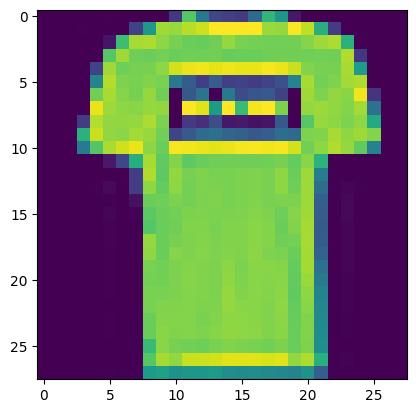

In [17]:
plt.imshow(X_train[1])

### Normalizing the Data

In [18]:
X_train = X_train.astype('float32')/255
X_test  = X_test.astype('float32')/255

### Reshaping the Data

In [19]:
X_train = X_train.reshape(-1, 28,28, 1)
X_test  = X_test.reshape(-1, 28,28, 1)

### Changing our output to Categorical

In [20]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot  = to_categorical(y_test)

### **CNN** Model

In [23]:
# object instance of Sequential class
model = Sequential()
# Must define the input shape in the first layer of the neural network
# Convolutions layer
# Filters --> learned during training and provide brightness to pixel on the basis of there weights # Kernal size --> height and width of 2d conv window or
# A number specifying both the height and width of the (square) convolution window.
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
# MaxPooling layer
model.add(MaxPooling2D (pool_size=(2,2)))
# Convolutions layer
model.add(Conv2D (64, (3,3)))
model.add(Activation('relu'))
# MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten to make our model 1D
model.add(Flatten())
# Fully connected layer
model.add(Dense (64))
# Output layer
model.add(Dense (10))
model.add(Activation ('softmax'))
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

### Compiling model

In [24]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

### Fitting model

In [25]:
model.fit(X_train, y_train_one_hot, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 86s 45ms/step - loss: 0.4395 - accuracy: 0.8400
Epoch 2/3
1875/1875 [==============================] - 89s 48ms/step - loss: 0.3009 - accuracy: 0.8919
Epoch 3/3
1875/1875 [==============================] - 103s 55ms/step - loss: 0.2614 - accuracy: 0.9041


### Testing our Model

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 5s 17ms/step - loss: 0.2855 - accuracy: 0.8991
Test loss 0.2855205833911896
Test accuracy 0.8991000056266785


### Prediction

In [28]:
predictions = model.predict(X_test)
print(np.argmax (np.round(predictions[0])))

313/313 [==============================] - 5s 15ms/step
9


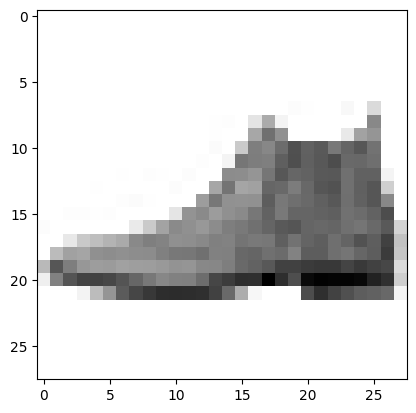

In [29]:
plt.imshow(X_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()